## Average shrimp  body weight prediction model develpment using Dataset-A1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_excel('ABW.xlsx')
df.head()

,DOC,Salinity (ppt),SDR (cm),Water colour,Water level (cm),TSS (ml/L),Average PH,Average DO (ppm),Running aerator (HP),TDF (kg),ABW (gm),Water temperature (˚C),PH change,Ammonia (ppm),Water exchange (cm)
0,1,16,50,4,120,1.0,8.25,5.78,56,1.7,0.008,29.10,0.3,0.026,0
1,2,16,48,5,120,2.0,8.25,5.60,31,2.4,0.023,28.65,0.1,0.028,0
2,3,16,55,4,132,0.5,8.05,5.33,29,3.4,0.037,28.10,0.1,0.023,5
3,4,16,60,4,128,0.5,8.00,5.46,44,4.2,0.052,28.40,0.0,0.018,0
4,5,16,45,4,126,0.5,8.00,5.43,57,5.0,0.066,28.15,0.2,0.030,0


In [3]:
data=pd.DataFrame(df.dtypes)
data=data.rename(columns={0:'DataType'})
data

,DataType
DOC,int64
Salinity (ppt),int64
SDR (cm),int64
Water colour,int64
Water level (cm),int64
TSS (ml/L),float64
Average PH,float64
Average DO (ppm),float64
Running aerator (HP),int64
TDF (kg),float64


In [4]:
df.isnull().sum()

DOC                       0
Salinity (ppt)            0
SDR (cm)                  0
Water colour              0
Water level (cm)          0
TSS (ml/L)                0
Average PH                0
Average DO (ppm)          0
Running aerator (HP)      0
TDF (kg)                  0
ABW (gm)                  0
Water temperature (˚C)    0
PH change                 0
Ammonia (ppm)             0
Water exchange (cm)       0
dtype: int64

In [5]:
x=df[['DOC', 'Salinity (ppt)', 'Water colour', 
       'TSS (ml/L)', 'Average PH', 'Average DO (ppm)']]
x

,DOC,Salinity (ppt),Water colour,TSS (ml/L),Average PH,Average DO (ppm)
0,1,16,4,1.0,8.25,5.78
1,2,16,5,2.0,8.25,5.60
2,3,16,4,0.5,8.05,5.33
3,4,16,4,0.5,8.00,5.46
4,5,16,4,0.5,8.00,5.43
...,...,...,...,...,...,...
395,96,22,0,6.0,7.70,4.78
396,97,23,0,4.0,7.75,4.72
397,98,23,5,5.0,7.75,5.33
398,99,23,5,6.0,7.70,4.85


In [6]:
y=df['ABW (gm)']
y

0       0.008
1       0.023
2       0.037
3       0.052
4       0.066
        ...  
395    19.100
396    19.200
397    19.300
398    19.400
399    19.500
Name: ABW (gm), Length: 400, dtype: float64

In [7]:
from sklearn.preprocessing import StandardScaler
rs=StandardScaler()
x=rs.fit_transform(x)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
linreg=LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [11]:
y_pred=linreg.predict(x_test) 

In [12]:
linreg.score(x_test, y_test)

0.9561849959876649

In [13]:
linreg.score(x_train,y_train)

0.9635373840525704

In [14]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(r2_score(y_test, y_pred))
print(mean_absolute_percentage_error(y_test, y_pred))

1.341516595271582
2.456996475248386
1.5674809329776187
0.9561849959876649
5.573824322824722


In [15]:
from sklearn.tree import DecisionTreeRegressor

In [16]:
treereg=DecisionTreeRegressor(splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1, random_state=42)
treereg.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [17]:
ytree_pred=treereg.predict(x_test)

In [18]:
treereg.score(x_train, y_train)

1.0

In [19]:
treereg.score(x_test,y_test)

0.9934447381470934

In [21]:
print(mean_absolute_error(y_test, ytree_pred))
print(mean_squared_error(y_test, ytree_pred))
print(np.sqrt(mean_squared_error(y_test, ytree_pred)))
print(r2_score(y_test, ytree_pred))
print(mean_absolute_percentage_error(y_test, ytree_pred))

0.39205000000000007
0.3675968
0.6062976166867226
0.9934447381470934
0.08941598329597361


In [22]:
from sklearn.ensemble import AdaBoostRegressor

In [23]:
adareg=AdaBoostRegressor(random_state=42, n_estimators=50)
adareg.fit(x_train, y_train)

AdaBoostRegressor(random_state=42)

In [24]:
yada_pred=adareg.predict(x_test)

In [25]:
adareg.score(x_train, y_train)

0.988860343101629

In [26]:
adareg.score(x_test, y_test)

0.987431154909274

In [27]:
print(mean_absolute_error(y_test, yada_pred))
print(mean_squared_error(y_test, yada_pred))
print(np.sqrt(mean_squared_error(y_test, yada_pred)))
print(r2_score(y_test, yada_pred))
print(mean_absolute_percentage_error(y_test, yada_pred))

0.7105931602710477
0.7048181047104962
0.8395344571311509
0.987431154909274
2.6873487874172888


In [28]:
from sklearn.ensemble import GradientBoostingRegressor

In [29]:
gbrreg=GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, loss='ls',min_samples_leaf=1)
gbrreg.fit(x_train, y_train)

GradientBoostingRegressor(random_state=42)

In [30]:
ygbr_pred=gbrreg.predict(x_test)

In [31]:
gbrreg.score(x_train, y_train)

0.9986719459370614

In [32]:
gbrreg.score(x_test, y_test)

0.9936740943240485

In [33]:
print(mean_absolute_error(y_test, ygbr_pred))
print(mean_squared_error(y_test, ygbr_pred))
print(np.sqrt(mean_squared_error(y_test, ygbr_pred)))
print(r2_score(y_test, ygbr_pred))
print(mean_absolute_percentage_error(y_test, ygbr_pred))

0.4530158284372535
0.35473528529612625
0.5955965793186914
0.9936740943240485
0.3716658991391955


In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
rf=RandomForestRegressor(n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features='auto', random_state=42, max_depth=None)
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [36]:
yrf_pred=rf.predict(x_test)

In [37]:
rf.score(x_train, y_train)

0.9993314234754698

In [38]:
rf.score(x_test, y_test)

0.9964706174207334

In [39]:
print(mean_absolute_error(y_test, yrf_pred))
print(mean_squared_error(y_test, yrf_pred))
print(np.sqrt(mean_squared_error(y_test, yrf_pred)))
print(r2_score(y_test, yrf_pred))
print(mean_absolute_percentage_error(y_test, yrf_pred))

0.31273662500000227
0.1979157768562516
0.4448772604396089
0.9964706174207334
0.1149510381238272


In [40]:
sns.set_style({'font.family':'serif','font.serif':'Times New Roman'})
plt.rcParams.update({'font.size':12})

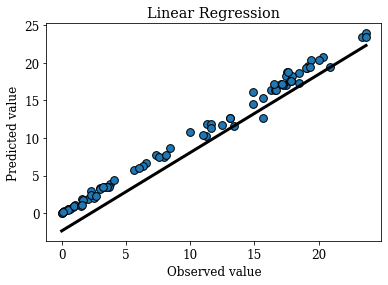

<Figure size 720x576 with 0 Axes>

In [41]:
fig, ax = plt.subplots()
plt.figure(figsize=(10,8))
ax.scatter(y_test, ytree_pred, edgecolors=(0,0,0),s=60)
ax.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()],"k-",lw=3)
ax.set_xlabel("Observed value")
ax.set_ylabel("Predicted value")
ax.set_title('Linear Regression')
plt.show()

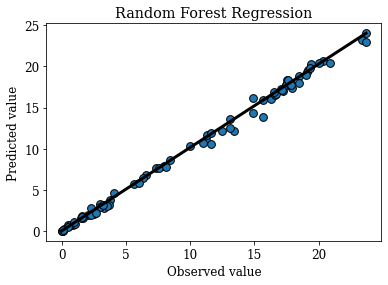

<Figure size 720x576 with 0 Axes>

In [42]:
fig, ax = plt.subplots()
plt.figure(figsize=(10,8))
ax.scatter(y_test, yrf_pred, edgecolors=(0,0,0),s=60)
ax.plot([y_test.min(), y_test.max()], [yrf_pred.min(), yrf_pred.max()],"k-",lw=3)
ax.set_xlabel("Observed value")
ax.set_ylabel("Predicted value")
ax.set_title('Random Forest Regression')
plt.show()

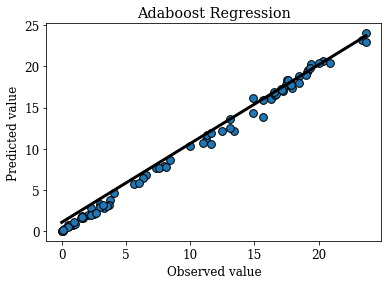

<Figure size 720x576 with 0 Axes>

In [43]:
fig, ax = plt.subplots()
plt.figure(figsize=(10,8))
ax.scatter(y_test, yrf_pred, edgecolors=(0,0,0),s=60)
ax.plot([y_test.min(), y_test.max()], [yada_pred.min(), yada_pred.max()],"k-",lw=3)
ax.set_xlabel("Observed value")
ax.set_ylabel("Predicted value")
ax.set_title('Adaboost Regression')
plt.show()